In [17]:
# Import Data Processing Libraries
import pandas as pd
import io
import requests
import seaborn as sns

import pickle
from sklearn.datasets import load_diabetes

In [2]:
# Import Data from Github Repo
url="https://raw.githubusercontent.com/byuibigdata/iliwycmbd_streamlit/main/iris.csv"
data=pd.read_csv(url)
data.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# Rename Columns to mathc old data set
data = data.rename(columns={'sepal.length': 'sepal_length', 'sepal.width': 'sepal_width', 'petal.length': 'petal_length', 'petal.width': 'petal_width', 'variety': 'species'})

#Shows the first five rows
#data.head(5)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

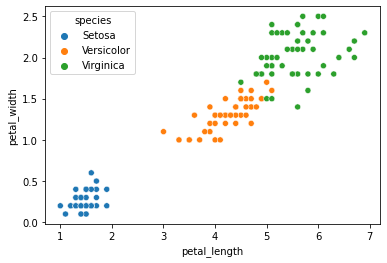

In [4]:
#Part 2 - Viualize the data

plot_1 = sns.scatterplot(data=data, x="petal_length", y="petal_width", hue="species")
plot_1

In [5]:
#Part C: Prepare the Data for Machine Learning

X = data[['petal_length', 'petal_width', 'sepal_width', 'sepal_length']]
X.head(5)

,petal_length,petal_width,sepal_width,sepal_length
0,1.4,0.2,3.5,5.1
1,1.4,0.2,3.0,4.9
2,1.3,0.2,3.2,4.7
3,1.5,0.2,3.1,4.6
4,1.4,0.2,3.6,5.0


In [6]:
# create y value 
y = data[['species']]
y.head(5)

,species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [7]:
# Import Ml Libraries
import numpy as np
from sklearn.model_selection import train_test_split

# Import and use the train_test_split() function to split the X and y
# dataframes into training and test sets.
#
# The training data should contain 80% of the samples and
# the test data should contain 20% of the samples.



In [8]:
# Seperate data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)



In [9]:
# Import ml libraries 
from sklearn.neighbors import KNeighborsClassifier


In [10]:
#Defines the class
cls = KNeighborsClassifier(n_neighbors=3)

In [23]:
model = cls.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [24]:
# Fit the model to the data

model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [25]:
# Make Predictions from Model

y_prediction = cls.predict(X_test)

In [26]:
# Gets Accuracy from fitted model
from sklearn.metrics import accuracy_score


f'{accuracy_score(y_test, y_prediction):.5f}'

'0.96667'

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


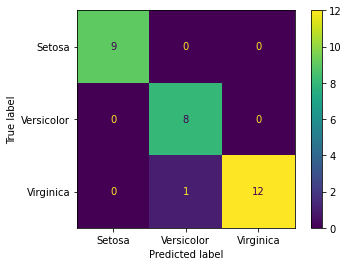

In [27]:
#confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

clf = confusion_matrix(y_test, y_prediction)

plot_confusion_matrix(cls, X_test, y_test)  
#plot.show()

In [28]:
# This cell will pickle the model 

pickle.dump(model, open('irirs_model.pkl', 'wb'))